<a href="https://colab.research.google.com/github/VikramKrrishna/CF/blob/main/Credit%20Card%20Defaulters%20Prediction/Credit_Card_Defaulters_Prediction_using_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import tensorflow as tf

In [88]:
tf.__version__

'2.8.2'

In [89]:
# Importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow import keras
import itertools
%matplotlib inline

In [90]:
# import to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
TW_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Credit Card Defaulters Prediction/creditcarddefault.csv')

In [92]:
TW_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [93]:
 TW_data.describe()
 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [94]:
TW_data.shape

(30000, 25)

In [95]:
TW_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [96]:
#removing the customer id and name and saving the dependent variable in x
x = TW_data.iloc[:,1:24].values

#saving the independent values in y
y = TW_data.iloc[:,24].values

print(x)


[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]


In [97]:
print(y)

[1 1 0 ... 1 1 1]


In [98]:
x.shape

(30000, 23)

In [99]:
#Splitting the data set into train and test using train_test_split library for cross validation

from sklearn.model_selection import train_test_split

#splitting the data in 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 111)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [100]:
#scaling the data using the preprocessing library
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [101]:
x_train[:1]

array([[ 0.48238852,  0.81447304,  0.18907673,  0.86211952, -0.48921975,
        -0.87463676, -0.72347864, -0.6983838 , -0.66637051,  0.23416564,
         0.25233359, -0.63042993, -0.63367788, -0.6645842 , -0.51248219,
        -0.57038965,  0.39521137, -0.0821721 , -0.22758026,  0.33473587,
        -0.28260403,  3.38918769, -0.15149706]])

In [102]:
x_test[:1]

array([[-0.90675918,  0.81447304,  0.18907673,  0.86211952, -1.02893075,
         0.01577297,  0.11171742,  1.81436202,  1.90333887,  1.99733463,
         1.99485427, -0.08225853, -0.02079874,  0.01128534,  0.05783857,
        -0.21686665, -0.49350834, -0.15334665, -0.22344936, -0.31721197,
        -0.22147931, -0.31355153, -0.2825194 ]])

## MODEL BUILDING USING KERAS

We are here using a sequential model from the keras as the data is simple

In [103]:
#importing the required modules from keras

from keras.models import Sequential
from keras.layers import Dense

In [104]:
#Step 1: initialization our model
class_model_keras = Sequential()

In [105]:
#Step 2: layers
# 1st HIDDEN layer
class_model_keras.add(Dense(24,input_dim =23, activation ='relu'))

#2nd  Hidden layer
# As the imput dim to this layer is the output from the previous layer
#we need not explicitly specify it here
class_model_keras.add(Dense(12, activation = 'relu'))

#Output layer
#sigmoid activation is used to get the output between 0 and 1
class_model_keras.add(Dense(1,activation = 'sigmoid'))

In [106]:
class_model_keras.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 24)                576       
                                                                 
 dense_15 (Dense)            (None, 12)                300       
                                                                 
 dense_16 (Dense)            (None, 1)                 13        
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Step 3: compiling the neural network
# In this step we have the library to choose the optimization method would like to use
#the loss function and the matrices that we require ad output
#binary_crossentropy loss function used when a binary output is expected

class_model_keras.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [108]:
# Step 4: Fitting the model

class_model_keras.fit(x_train,y_train, batch_size = 10, epochs = 100)

Epoch 1/100
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4720 - accuracy: 0.8092
Epoch 2/100
2100/2100 [==============================] - 6s 3ms/step - loss: 0.4410 - accuracy: 0.8196
Epoch 3/100
2100/2100 [==============================] - 7s 3ms/step - loss: 0.4350 - accuracy: 0.8207
Epoch 4/100
2100/2100 [==============================] - 8s 4ms/step - loss: 0.4324 - accuracy: 0.8204
Epoch 5/100
2100/2100 [==============================] - 7s 3ms/step - loss: 0.4304 - accuracy: 0.8200
Epoch 6/100
2100/2100 [==============================] - 5s 2ms/step - loss: 0.4290 - accuracy: 0.8220
Epoch 7/100
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4276 - accuracy: 0.8217
Epoch 8/100
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4272 - accuracy: 0.8220
Epoch 9/100
2100/2100 [==============================] - 3s 2ms/step - loss: 0.4259 - accuracy: 0.8226
Epoch 10/100
2100/2100 [==============================] - 4s 2ms/step - l

In [115]:
#step: 5 predicting the results for test data
y_pred = class_model_keras.predict(x_test)

In [110]:
y_pred

array([[0.45729735],
       [0.06935564],
       [0.21398032],
       ...,
       [0.08635211],
       [0.4481155 ],
       [0.14613146]], dtype=float32)

In [111]:
#As the values are the probabilitiy we may need to set up a threshold to find the actual values
pred = (y_pred>0.5)

In [112]:
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [113]:
y_pred[pred]

array([0.8326257, 0.7598547, 0.5350214, ..., 0.6515179, 0.8029264,
       0.7764735], dtype=float32)

In [127]:
target_names = ['no','yes']

#https://scikit-learn.org/0.18/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6609  371]
 [1269  751]]


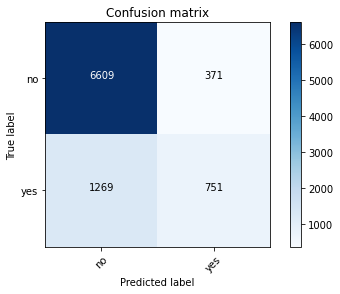

In [128]:
#Formulating the confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

plt.figure()
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[6609,  371],
       [1269,  751]])

In [133]:
#Evaluate the model

scores = class_model_keras.evaluate(x_test,y_test)
print(scores)

282/282 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.8178
[0.4518955945968628, 0.8177777528762817]


In [134]:
print("\nACCURACY: %.2f%%" %(scores[1]*100))


ACCURACY: 81.78%


CONCLUSION is model with keras having 82% accuracy